# __Preprocessed data__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

from typing import List

import matplotlib.pyplot as plt

import scripts.data_loading as dl
import scripts.data_preprocessing as dp

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.cmap"] = "plasma"

In [2]:
def decode_caption(vocabulary: dp.Vocabulary, encoded_caption: List[int]) -> str:
    caption = []
    for word_idx in encoded_caption:
        caption.append(vocabulary.idx2word(word_idx))
    
    return " ".join(caption)

In [3]:
coco = dl.CocoCaptions(dset_paths=dl.TRAINING_DATASET_PATHS[dl.DatasetType.TRAIN])

coco_preprocessed = dl.CocoCaptions(
    dset_paths=dl.TRAINING_DATASET_PATHS[dl.DatasetType.TRAIN],
    transform=dp.VGGNET_PREPROCESSING_PIPELINE,
    target_transform=dp.TextPipeline()
)

loading annotations into memory...
Done (t=1.99s)
creating index...
index created!
loaded
loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
loaded


In [4]:
sample_index = 999

encoded_img, encoded_caption = coco_preprocessed[sample_index]
img, caption = coco[sample_index]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


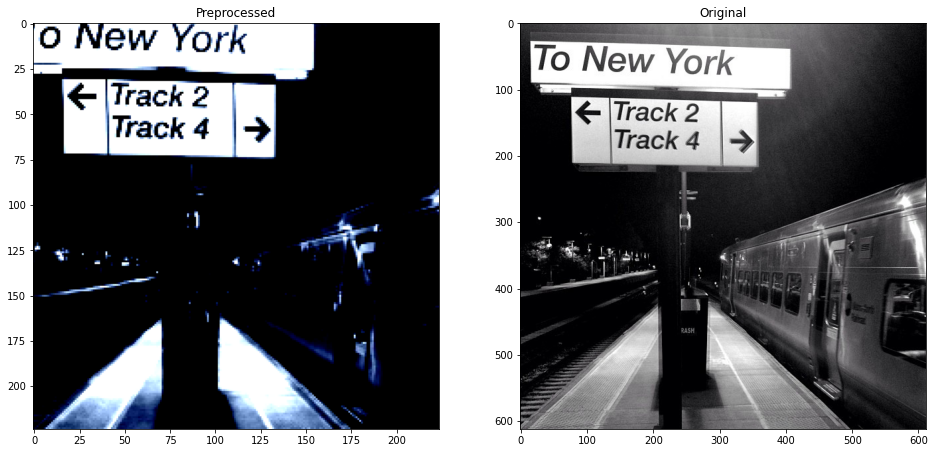

In [5]:
figure, axis = plt.subplots(1, 2, figsize=(16, 8))

axis[0].imshow(encoded_img.permute(1, 2, 0))
axis[0].set_title("Preprocessed")

axis[1].imshow(img)
axis[1].set_title("Original")

plt.show()

In [6]:
print(encoded_caption)
print(decode_caption(coco_preprocessed.target_transform.vocabulary, encoded_caption))

[10000, 0, 55, 23, 846, 9, 869, 2458, 626, 75, 275, 1207, 6, 655, 75, 275, 2242, 6, 3, 167, 516, 7, 331, 13, 275, 2242, 10001]
<SOS> a sign that says to new york left for track 2 and right for track 4 and the light rail is waiting at track 4 <EOS>


In [7]:
print(caption)

A sign that says to New York left for Track 2 and right for Track 4 and the light rail is waiting at Track 4.


In [8]:
# Sample batch loaded from CocoLoader
data_loader = dl.CocoLoader(coco_preprocessed, batch_size=64, num_workers=3)
data_iter = iter(data_loader)
images, captions = next(data_iter)

In [9]:
print(f"Images batch {images.shape}")
print(f"Captions batch {captions.shape}")

Images batch torch.Size([64, 3, 224, 224])
Captions batch torch.Size([64, 51])


In [10]:
captions = captions.tolist()

In [11]:
print(captions[0])
print(captions[-1])

[10000, 12, 78, 22, 34, 850, 31, 4, 0, 182, 1, 1421, 65, 2, 0, 8, 283, 1486, 0, 34, 204, 9, 1584, 47, 34, 924, 1, 34, 1118, 5, 133, 167, 62, 34, 1186, 4, 121, 4, 36, 2, 244, 6, 12, 1186, 1, 206, 6, 314, 10002, 139, 10001]
[10000, 11, 1342, 9912, 0, 10002, 4191, 6, 50, 15, 819, 717, 6, 27, 2414, 9904, 0, 2382, 1583, 6, 4, 3, 915, 0, 46, 19, 83, 0, 4367, 6, 67, 9944, 610, 311, 7, 1036, 1, 0, 3565, 559, 5, 1568, 1085, 10001, 10003, 10003, 10003, 10003, 10003, 10003, 10003]


In [12]:
print(decode_caption(coco_preprocessed.target_transform.vocabulary, captions[0]))
print(decode_caption(coco_preprocessed.target_transform.vocabulary, captions[-1]))

<SOS> two men holding tennis rackets up in a hand on either side of a man smiling hugging a tennis racket to chest by tennis net on tennis course with many light green tennis balls in air in front of them and two balls on ground and all <UNK> behind <EOS>
<SOS> an interior suggests a <UNK> vessel and has people facing away and some letters suggesting a navy t-shirt and in the foreground a young woman wearing a headset and other technical gear who is writing on a vertical surface with neat lines <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
